In [68]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
datadir = r"data"
categories = ["non-Vehicles","Vehicles"]

training_data = []
img_size = 60
for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            # plt.imshow(img_array)
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf  
import keras 
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [70]:
import random
random.shuffle(training_data)

In [71]:
x_train = []
y_train = []
for features, labels in training_data: # [[image_1, class]]
    x_train.append(features)
    y_train.append(labels)

In [72]:
x_train = np.array(x_train).reshape(-1, img_size, img_size, 3)

In [73]:
x_train.shape

(17760, 60, 60, 3)

In [74]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [75]:
Xtrain=Xtrain.astype('float32')
Xtest=Xtest.astype('float32')
Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
Ytrain=np.array(Ytrain)
Ytest=np.array(Ytest)

In [76]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=5,strides=(1,1),padding="same",activation='relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Conv2D(filters=64,kernel_size=5,strides=(1,1),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Conv2D(filters=64,kernel_size=5,strides=(1,1),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\3moora\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# Now, you can safely fit the model
model.fit(Xtrain, Ytrain, epochs=15, batch_size=40)

Epoch 1/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8362 - loss: 1.8669
Epoch 2/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9646 - loss: 0.1051
Epoch 3/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9801 - loss: 0.0612
Epoch 4/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9756 - loss: 0.0750
Epoch 5/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9887 - loss: 0.0328
Epoch 6/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9906 - loss: 0.0288
Epoch 7/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9772 - loss: 0.0775
Epoch 8/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9932 - loss: 0.0194
Epoch 9/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9917 - loss: 0.0308
Epoch 10/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9914 - loss: 0.0307
Epoch 11/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9873 - loss: 0.0407
Epoch 12/15
356/356 ━━━━━━━━━━

In [78]:
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9840 - loss: 0.0567
Test Loss: 0.05486786738038063
Test Accuracy: 0.9842342138290405


In [88]:
import cv2

# Use raw string for Windows paths
image_path = r"C:\Users\3moora\Downloads\vehicle.jpg"
# Read the image
image = cv2.imread(image_path)
image_array = np.array(image)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (60,60))
image_resized=image_resized.astype('float32')
img=np.array(image_resized)
img = np.expand_dims(img, axis=0)



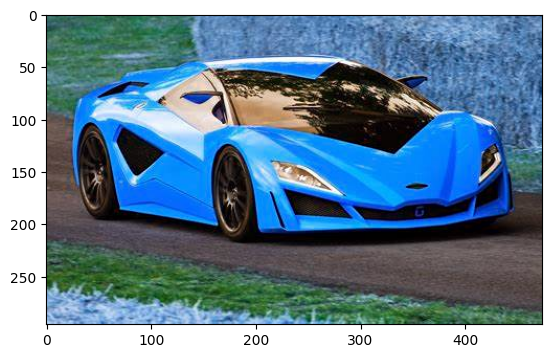

In [89]:
plt.imshow(image)
plt.show()

In [90]:

model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)

In [97]:
# Use raw string for Windows paths
image_path2 = r"C:\Users\3moora\Downloads\inbox_1313949_33dc0181933625397344a880cec69615_cover_4.png"
# Read the image
image2 = cv2.imread(image_path2)
image_array2= np.array(image2)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image_resized2 = cv2.resize(image_rgb2, (60,60))
image_resized2=image_resized2.astype('float32')
img2=np.array(image_resized2)
img2 = np.expand_dims(img2, axis=0)

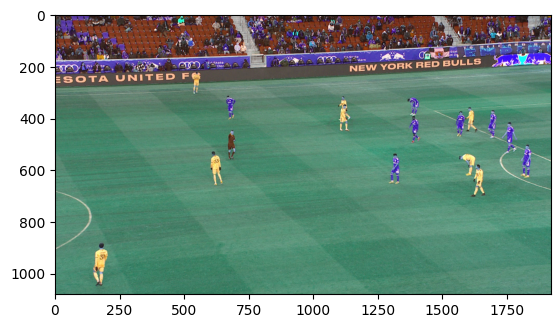

In [98]:
plt.imshow(image2)
plt.show()

In [99]:
model.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[5.3971744e-05]], dtype=float32)